In [1]:
#mapping some polygons - 
import pandas as pd
import geopandas as gpd
from shapely.geometry.polygon import Polygon
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib import cm
import folium
import numpy as np
%matplotlib inline

In [2]:
#dataframes for csv files - Buffers
dfbuffer = pd.read_csv('bufferlatlongV2.csv', delimiter = ',').astype(float)
dfhurdat = pd.read_csv('hurdatlatlong.csv', delimiter = ',')
dfcoast = pd.read_csv('coastlatlongV2.csv', delimiter = ',').astype(float)
dfbasin = pd.read_csv('jamesbasinlatlongV2.csv', delimiter = ',').astype(float)



In [3]:
#create the polygons
buffer_geom =Polygon(zip(dfbuffer['Lon'],dfbuffer['Lat']))
basin_geom = Polygon(zip(dfbasin['Lon'],dfbasin['Lat']))
crs = {'init' : 'epsg:4326'}
bufferpoly = gpd.GeoDataFrame(index = [0], crs = crs, geometry = [buffer_geom])
bufferpoly.to_file(filename = 'buffer.geojson', driver = 'GeoJSON')
basinpoly = gpd.GeoDataFrame(index = [0], crs = crs, geometry = [basin_geom])
basinpoly.to_file(filename = 'basin.geojson', driver = 'GeoJSON')

/Users/williampc/opt/anaconda3/envs/geop/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [4]:
import pandas as pd
from datetime import datetime
def lat_lon_to_float (v):
    """Convert strings from NHC to float locations"""
    if (v[-1] == 'S') or (v[-1] == 'W'):
        multiplier = -1
    else:
        multiplier = 1
    return float(v[:-1])*multiplier

In [5]:
hurdata = []
with open ('hurdat2.txt', 'r') as f:
    for line in f.readlines():
        if line.startswith('AL'):
            storm_id = line.split(',')
            storm_number = storm_id[0].strip()
            storm_name = storm_id[1].strip()
        else:
            location_line = line.split(',')
            dt = datetime.strptime(location_line[0] + location_line[1],"%Y%m%d %H%M")
            storm_status = location_line[3].strip()
            storm_lat = lat_lon_to_float(location_line[4].strip())
            storm_lon = lat_lon_to_float(location_line[5].strip())
            max_speed = float(location_line[6].strip())
            hurdata.append([storm_number,storm_name,storm_status,storm_lat,storm_lon,dt,max_speed])

In [6]:
df = pd.DataFrame(hurdata, columns = ['Storm Number','Storm Name', 'Storm Status', 'Lat', 'Lon','Time', 'Max Speed'])
df.head()
len(df)


51817

In [7]:
from sympy import Point, Polygon
import pandas as pd
import geopandas as gpd
from shapely.geometry import *
# # #changing to a GeoDataFrame to create geometry series
# hurdatgdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Lon,df.Lat))
# # hurdatgdf.head()
# # len(hurdatgdf)
# T = pd.merge(dfbuffer, dfhurdat, how='inner', on=['Lat', 'Lon'])
# print(T)
# len(T)
# T
dfinbuffer = pd.merge(dfhurdat,dfbuffer,on=['Lat','Lon'])
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(dfinbuffer)

    Unnamed: 0 Storm Number Storm Name Storm Status   Lat   Lon  \
0         2874     AL021876    UNNAMED           HU  36.0 -77.3   
1         3620     AL021879    UNNAMED           HU  37.3 -75.4   
2         3620     AL021879    UNNAMED           HU  37.3 -75.4   
3         4906     AL081885    UNNAMED           EX  39.0 -78.0   
4         4906     AL081885    UNNAMED           EX  39.0 -78.0   
5         4906     AL081885    UNNAMED           EX  39.0 -78.0   
6         4906     AL081885    UNNAMED           EX  39.0 -78.0   
7         4906     AL081885    UNNAMED           EX  39.0 -78.0   
8         4906     AL081885    UNNAMED           EX  39.0 -78.0   
9         4947     AL021886    UNNAMED           TD  38.4 -76.9   
10        4947     AL021886    UNNAMED           TD  38.4 -76.9   
11        4947     AL021886    UNNAMED           TD  38.4 -76.9   
12        4947     AL021886    UNNAMED           TD  38.4 -76.9   
13        4947     AL021886    UNNAMED           TD  38.4 -76.

In [8]:
# total map with all storms and buffers
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [9]:
plot_crs = ccrs.LambertConformal(central_longitude =-100., central_latitude = 45)
data_crs = ccrs.PlateCarree()

/Users/williampc/opt/anaconda3/envs/geop/lib/python3.9/site-packages/cartopy/mpl/feature_artist.py:213: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  c = matplotlib.collections.PathCollection(paths,


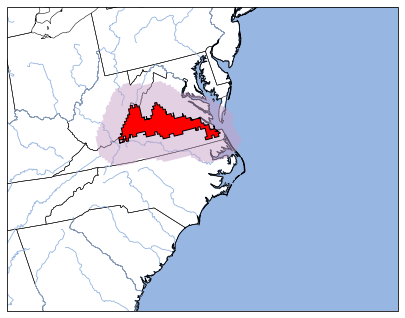

In [10]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader


def basincoords():
    """
    Return a list of latitudes and a list of longitudes (lons, lats)
    for James River Basin 

    """
    basinlon = dfbasin['Lon']
    basinlat = dfbasin['Lat']

    return basinlon, basinlat

def buffercoords():
    """
    Return a list of latitudes and a list of longitudes (lons, lats)
    for James River Basin 

    """
    bufferlon = dfbuffer['Lon']
    bufferlat = dfbuffer['Lat']
    

    return bufferlon, bufferlat
bufferlon, bufferlat = buffercoords()
basinlon, basinlat = basincoords()

#ax.set_title('James River Basin and Buffer - Virginia, USA')

# turn the lons and lats into a shapely LineString
buffer = sgeom.LineString(zip(bufferlon, bufferlat))
basin = sgeom.LineString(zip(basinlon, basinlat))


fig = plt.figure(figsize = (7,7))
ax = plt.subplot(1,1,1,projection = plot_crs)

ax.set_extent([-85,-70,32,40],data_crs)
ax.coastlines('50m', edgecolor = 'k', linewidth = 0.75)
ax.add_feature(cfeature.STATES, linewidth = 0.5)
ax.add_feature(cfeature.RIVERS, linewidth = 0.85)
ax.add_feature(cfeature.OCEAN)
ax.add_geometries([buffer], ccrs.PlateCarree(),facecolor='#C8A2C8', alpha=0.5)
ax.add_geometries([basin], ccrs.PlateCarree(),facecolor='rgb', edgecolor='k')



#for storm_number in vahurc['Storm Number'].unique():
    #data = df[jameshurc['Storm Number'] == storm_number]
    #print(vahurc)
ax.plot(dfinbuffer['Lon'], dfinbuffer['Lat'])#,dfbuffer['Lon'],dfbuffer['Lat'],dfbasin['Lat'],dfbasin['Lon'], transform = data_crs)